# Law of Large Numbers

The LLN states that when sampling from a population, as the sample size $n$ tends to infinity, the mean of the sample $m$ converges to the population's mean $\mu$. This assumes that the samples of the population are independent and identically distributed and that the population distribution has a finite mean and variance.

We can test this by computational experiment, let's say we have a distribution of people heights in centimeters with $\mu = 170$ and $\sigma = 8$

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
mu = 170
sigma = 8

We plot the PDF from $\mu \pm 5\sigma$

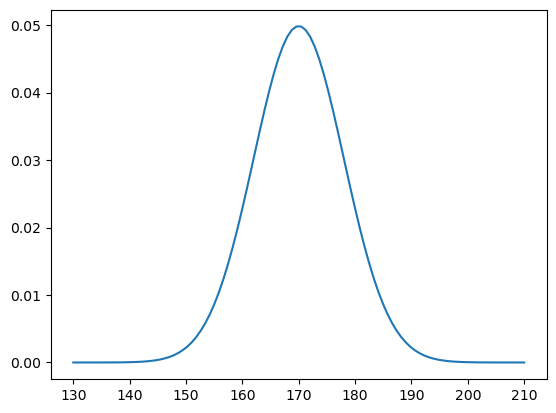

In [3]:
normal_dist = norm(mu, sigma)

x = np.linspace(mu-5*sigma, mu+5*sigma, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, normal_dist.pdf(x))

To simulate the LLM we will grab random samples of increasing size $n$ from $[1, 1000]$ and compute their means $m$.

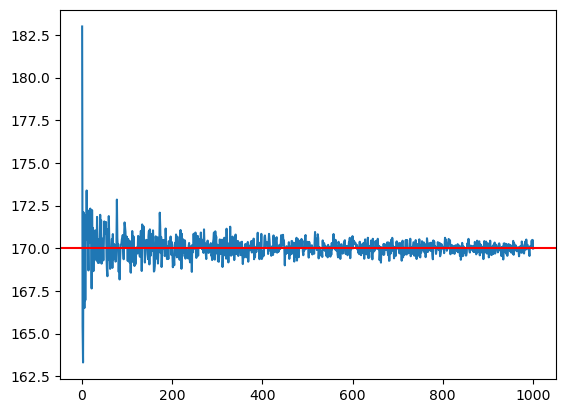

In [4]:
np.random.seed(1)

ns = list(range(1, 1001))
ms = [normal_dist.rvs(n).mean() for n in ns]

fig, ax = plt.subplots(1, 1)
ax.plot(ns, ms)
ax.axhline(y=mu, color='r')

Let's look at another distribution such as the loguniform and test if the LLN also holds, a real case for this distribution could be the net worth of people, most of them have little money while very few have very large net worths, we can model this with the $a, b$ parameters of the loguniform which correspond to the minimum and maximum values, for the example let's say that you can have from 1 dollar to a million dollars.

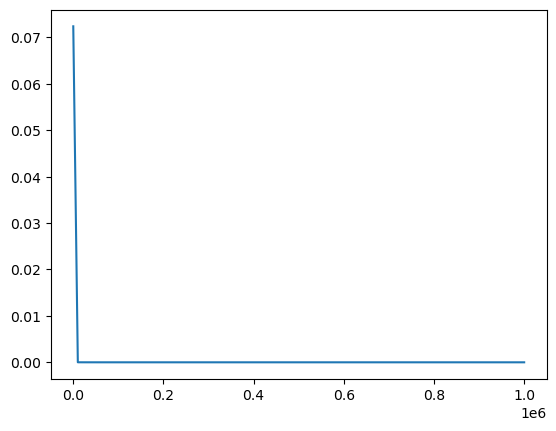

In [5]:
from scipy.stats import loguniform

a, b = 1, 1_000_000
loguniform_dist = loguniform(a, b)

x = np.linspace(a, b, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, loguniform_dist.pdf(x))

We obtain the mean for this distribution, and simulate random sampling of increasing sizes from $[1, 1000]$ to test if the sample means converge to the population $\mu$

In [6]:
lu_mu, lu_var = loguniform_dist.stats()
lu_mu

72382.34126812828

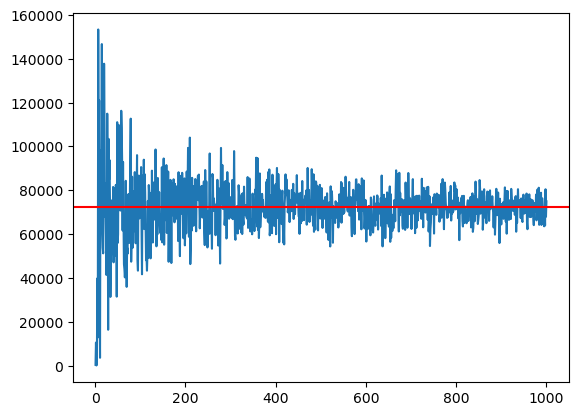

In [7]:
np.random.seed(1)

ns = list(range(1, 1001))
ms = [loguniform_dist.rvs(n).mean() for n in ns]

fig, ax = plt.subplots(1, 1)
ax.plot(ns, ms)
ax.axhline(y=lu_mu, color='r')

Let's test now the binomial distribution, in this case we no longer have a continous variable such as height or net worth, but a binary variable (number of successes from an experiment), let's say we have a referendum in which the population of people votes yes or no, in a very large population the percentage of people that voted yes was 70%, so for any random sampling of the population the probability of that sampled person to have voted yes is $p=0.7$, we can simulate this with the following function:

In [8]:
def binom_sample(p, n):
    return np.random.rand(n) < p

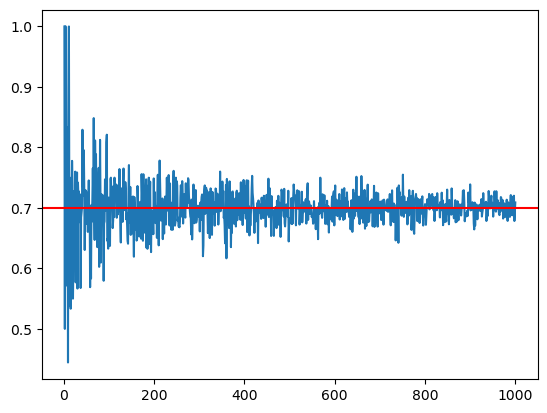

In [9]:
np.random.seed(1)

p = 0.7

ns = list(range(1, 1001))
ms = [binom_sample(p, n).mean() for n in ns]

fig, ax = plt.subplots(1, 1)
ax.plot(ns, ms)
ax.axhline(y=p, color='r')

We can notice that for different distributions, the sample means do converge to the population $\mu$ as the sample size tends to infinity, however an interesting follow up question would be: do different distributions cause the sample means to converge faster or slower than others? In practice our sample sizes will not really tend to infinity, let's consider the same binomial distribution but with a different $p$ which is very close to 1, in this situation the rare event (a False outcome in this case) will not show up frequently, intuitively this means we would need a larger sample to get just one of these rare events, we can simulate it as follows:

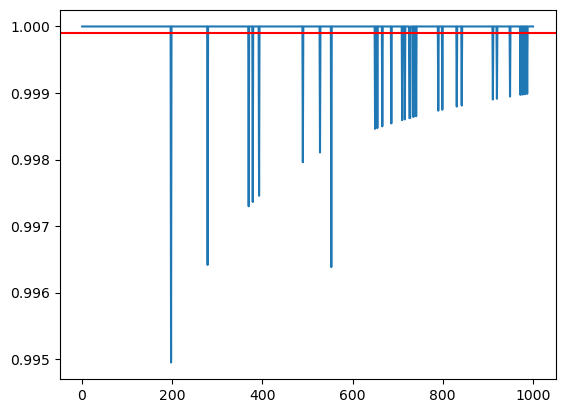

In [10]:
np.random.seed(1)

p = 0.9999

ns = list(range(1, 1001))
ms = [binom_sample(p, n).mean() for n in ns]

fig, ax = plt.subplots(1, 1)
ax.plot(ns, ms)
ax.axhline(y=p, color='r')

This plot doesn't converge as smoothly, the sample means when $n$ goes from 1 to 200 are 1.0, there isn't any change whatsoever as opposed to the case when $p=0.7$ where we see a gradual convergence from sample size 1 to 200, this reflects our intuition that larger sample sizes are needed for the rare event to show up in them. While in this case the absolute differences from $|\mu - m|$ or absolute errors are smaller we need to consider what do they imply in our specific context, it could be that a 0.005 absolute error implies a very large consequence (a black swan event).

https://math.stackexchange.com/questions/4598239/does-the-law-of-large-number-work-better-for-some-distributions-compared-to-ot